<a href="https://colab.research.google.com/github/Yadukrishnan1/Computer-Vision/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [ ]:
# TensorFlow for 
import tensorflow as tf
from tensorflow import keras

# Python libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion.load_data()
fashion_label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

T-shirt/top


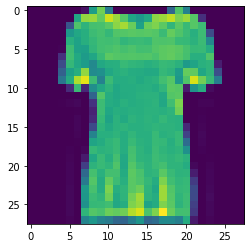

In [ ]:
# Print to see the item and labels
plt.imshow(x_train[10])
print(fashion_label[y_train[10]])

In [ ]:
# Data exploration
print('x_train shape = ', x_train.shape)
print('y_train shape = ', y_train.shape, '\n')

print('x_test shape = ', x_test.shape)
print('y_test shape = ', y_test.shape)

x_train shape =  (60000, 28, 28)
y_train shape =  (60000,) 

x_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


In [ ]:
# Normalization of the data
x_train=x_train/255.0
x_test=x_test/255.0

In [54]:
# Using callbacks to stop the training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy, therefore stopped training.")
      self.model.stop_training = True
callbacks = myCallback()

# Set up the neural network from Keras
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [56]:
# Compiling the model

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6344 - accuracy: 0.7803
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3711 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3152 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.8995

Reached 90% accuracy, therefore stopped training.


In [57]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3496 - accuracy: 0.8762

Test accuracy: 0.8762000203132629
